## Funções auxiliares

In [1]:
from IPython.display import clear_output
# Iniciando rede neural preditiva

import torch, torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.nn.functional as F

import serial

def lerRobo(arduino):
    
    msg = str(arduino.readline()) #Lê os dados em formato de string
    return msg
    
def preverProximoEstado(dados_0,dados_1,dados_2, modeloRobo):
    
    estadoAtual=[]
    for k in dados_0:
        estadoAtual.append(k)
    for k in dados_1:
        estadoAtual.append(k)
    for k in dados_2:
        estadoAtual.append(k)
    
    #converte o vetor do tipo numpy para torch
    x0=torch.from_numpy(np.array(estadoAtual,dtype=np.float)).float()
    
    
    #obtem a saida da rede neural preditiva
    yh0=roboQuadrupede.forward(x0) 
    
    
    vetorPrevisto=[]
    
    for k in yh0:
        vetorPrevisto.append(((k.item()*360)-180)//1)

    
    return vetorPrevisto


def proporAcaoDeControle(erro_X,erro_Y,controlador):
    
    X,Y=setPoint
    
    return [90,90,90,90,90,90,90,90,90,90,90,90]


def torchToNumpy(vetorTorch):
    
    lista=[]
    
    for k in vetorTorch:
        
        lista.append(k.item())
    
    vetorNumpy=np.array(lista)
    
    return vetorNumpy

def construirEstadoComNovoComando(estadoAtual,CMP):
    
    estadoCorrigido=np.zeros(105)
    
    estadoCorrigido=np.array(estadoAtual)
    estadoCorrigido[12]=CMP[0]
    estadoCorrigido[13]=CMP[1]
    estadoCorrigido[14]=CMP[2]
    estadoCorrigido[15]=CMP[3]
    estadoCorrigido[16]=CMP[4]
    estadoCorrigido[17]=CMP[5]
    estadoCorrigido[18]=CMP[6]
    estadoCorrigido[19]=CMP[7]
    estadoCorrigido[20]=CMP[8]
    estadoCorrigido[21]=CMP[9]
    estadoCorrigido[22]=CMP[10]
    estadoCorrigido[23]=CMP[11]
    
    return estadoCorrigido
    
def calcularErro(X,Y,setPoint):
    lossFun=nn.MSELoss()
    
    erro=X-setPoint[0]+Y-setPoint[1]
    
    return erro

def comandarRobo(CM):
    
    return 0


def atualizarEstado(estadoAtual,CM,online,X,Y,disturbio):
    
    if(online):#se estiver online, envia-se o comando ao robo e pega o estado atualizado
        comandarRobo(CM)
        estadoAtualizado=lerRobo()
        
    else: # se estiver offline, atualiza o estado do do robo com base no modelo
        
        # EM: Em será considerado igual ao CM
        # CM: Construido a partir do CM escolhido
        # Gy:  os valores serão estimados com base nas variações em X,Y,z
        # Ac: os valores serão estimados com base nas variações em X,Y,z
        #Tmp: utiliza uma constante
        #ult: Utiliza uma constante
        #X,Y,Z: X e y serão os valores previstos, z será constante
        estadoAtualizado=np.zeros(105)
        
        
        estadoAtualizado[0]=CM[0]
        estadoAtualizado[1]=CM[1]
        estadoAtualizado[2]=CM[2]
        estadoAtualizado[3]=CM[3]
        estadoAtualizado[4]=CM[4]
        estadoAtualizado[5]=CM[5]
        estadoAtualizado[6]=CM[6]
        estadoAtualizado[7]=CM[7]
        estadoAtualizado[8]=CM[8]
        estadoAtualizado[9]=CM[9]
        estadoAtualizado[10]=CM[10]
        estadoAtualizado[11]=CM[11]
        
        estadoAtualizado[12]=CM[0]
        estadoAtualizado[13]=CM[1]
        estadoAtualizado[14]=CM[2]
        estadoAtualizado[15]=CM[3]
        estadoAtualizado[16]=CM[4]
        estadoAtualizado[17]=CM[5]
        estadoAtualizado[18]=CM[6]
        estadoAtualizado[19]=CM[7]
        estadoAtualizado[20]=CM[8]
        estadoAtualizado[21]=CM[9]
        estadoAtualizado[22]=CM[10]
        estadoAtualizado[23]=CM[11]
        
        
        estadoAtualizado[24]=0
        estadoAtualizado[25]=0
        estadoAtualizado[26]=0
        
        
        estadoAtualizado[27]=0
        estadoAtualizado[28]=0
        estadoAtualizado[29]=0
        
        estadoAtualizado[30]=25
        
        estadoAtualizado[31]=10
        
        estadoAtualizado[32]=X+random.randint(-1*disturbio,disturbio)
        estadoAtualizado[33]=Y+random.randint(-1*disturbio,disturbio)
        estadoAtualizado[34]=0
        
        
        estadoAtualizado[35]=estadoAtual[0]
        estadoAtualizado[36]=estadoAtual[1]
        estadoAtualizado[37]=estadoAtual[2]
        estadoAtualizado[38]=estadoAtual[3]
        estadoAtualizado[39]=estadoAtual[4]
        estadoAtualizado[40]=estadoAtual[5]
        estadoAtualizado[41]=estadoAtual[6]
        estadoAtualizado[42]=estadoAtual[7]
        estadoAtualizado[43]=estadoAtual[8]
        estadoAtualizado[44]=estadoAtual[9]
        estadoAtualizado[45]=estadoAtual[10]
        estadoAtualizado[46]=estadoAtual[11]
        estadoAtualizado[47]=estadoAtual[12]
        estadoAtualizado[48]=estadoAtual[13]
        estadoAtualizado[49]=estadoAtual[14]
        estadoAtualizado[50]=estadoAtual[15]
        estadoAtualizado[51]=estadoAtual[16]
        estadoAtualizado[52]=estadoAtual[17]
        estadoAtualizado[53]=estadoAtual[18]
        estadoAtualizado[54]=estadoAtual[19]
        estadoAtualizado[55]=estadoAtual[20]
        estadoAtualizado[56]=estadoAtual[21]
        estadoAtualizado[57]=estadoAtual[22]
        estadoAtualizado[58]=estadoAtual[23]
        estadoAtualizado[59]=estadoAtual[24]
        estadoAtualizado[60]=estadoAtual[25]
        estadoAtualizado[61]=estadoAtual[26]
        estadoAtualizado[62]=estadoAtual[27]
        estadoAtualizado[63]=estadoAtual[28]
        estadoAtualizado[64]=estadoAtual[29]
        estadoAtualizado[65]=estadoAtual[30]
        estadoAtualizado[66]=estadoAtual[31]
        estadoAtualizado[66]=estadoAtual[32]
        estadoAtualizado[66]=estadoAtual[33]
        estadoAtualizado[69]=estadoAtual[34]
        
        estadoAtualizado[70]=estadoAtual[35]
        estadoAtualizado[71]=estadoAtual[36]
        estadoAtualizado[72]=estadoAtual[37]
        estadoAtualizado[73]=estadoAtual[38]
        estadoAtualizado[74]=estadoAtual[39]
        estadoAtualizado[75]=estadoAtual[40]
        estadoAtualizado[76]=estadoAtual[41]
        estadoAtualizado[77]=estadoAtual[42]
        estadoAtualizado[78]=estadoAtual[43]
        estadoAtualizado[79]=estadoAtual[44]
        estadoAtualizado[80]=estadoAtual[45]
        estadoAtualizado[81]=estadoAtual[46]
        estadoAtualizado[82]=estadoAtual[47]
        estadoAtualizado[83]=estadoAtual[48]
        estadoAtualizado[84]=estadoAtual[49]
        estadoAtualizado[85]=estadoAtual[50]
        estadoAtualizado[86]=estadoAtual[51]
        estadoAtualizado[87]=estadoAtual[52]
        estadoAtualizado[88]=estadoAtual[53]
        estadoAtualizado[89]=estadoAtual[54]
        estadoAtualizado[90]=estadoAtual[55]
        estadoAtualizado[91]=estadoAtual[56]
        estadoAtualizado[92]=estadoAtual[57]
        estadoAtualizado[93]=estadoAtual[58]
        estadoAtualizado[94]=estadoAtual[59]
        estadoAtualizado[95]=estadoAtual[60]
        estadoAtualizado[96]=estadoAtual[61]
        estadoAtualizado[97]=estadoAtual[62]
        estadoAtualizado[98]=estadoAtual[63]
        estadoAtualizado[99]=estadoAtual[64]
        estadoAtualizado[100]=estadoAtual[65]
        estadoAtualizado[101]=estadoAtual[66]
        estadoAtualizado[102]=estadoAtual[67]
        estadoAtualizado[103]=estadoAtual[68]
        estadoAtualizado[104]=estadoAtual[69]
        
        return estadoAtualizado

        



In [2]:
import torch, torchvision
import numpy as np
import time
def buscaLinha(arq,i):
    arq1 = open(arq)#abre o arquivo
    linhas = arq1.readlines()#transforma em um vetor com as linhas do arquivo
    cont=0#conta a linha atual
    for linha in linhas: #percorre a linha
        if("{" in linha):#verifica se a linha contem "{", para excluir as linhas invalidas(sem dados)
            cont=cont+1#incrementa a linha
            if(cont==i):
                linha=linha.replace("{","") #retira a chave da linha
                linha=linha.replace("}","")# retira a chave da linha
                return linha
def tratarX(x):
    xLista=[]
    xTratado=x.split()
    cont=0
    
    for k in xTratado:
        if(cont>2):
            xLista.append(k)
        cont=cont+2
    
    linhaString=""
    
    for k in xLista:
        linhaString=linhaString+k+" "
    return linhaString
    
    
def gerarDadosTrain(arq):#Cria dados de treinamento xTrain e yTrain a partir de um arquivo
    xTrain=[]
    yTrain=[]
    arq1 = open(arq)#abre o arquivo
    linhas = arq1.readlines()#transforma em um vetor com as linhas do arquivo
    cont=0#conta a linha atual
    tamanhox=0
    tamanhoy=0
    for linha in linhas: #percorre a linha
        if("{" in linha):#verifica se a linha contem "{", para excluir as linhas invalidas(sem dados)
            cont=cont+1#incrementa a linha
            linha=linha.replace("{","") #retira a chave da linha
            linha=linha.replace("}","")# retira a chave da linha
            #print("Linha: "+ str(cont))# exibe o numero da linha
            #print(linha)#Exibe a linha
            if(cont>=4):#se a linha for 4 ou maior, ja pode criar os dados, pois utiliza-se as 3 linhas anteriores como entrada
                linhay=buscaLinha(arq,cont)
                listaS=linhay.split()
                listaSTratada=[]
                contCaracter=0
                for k in listaS:
                    contCaracter=contCaracter+1
#                     if((contCaracter>2 and contCaracter<=14) or contCaracter>26):
#                         listaSTratada.append(k)
                    if(contCaracter>34 and contCaracter<37):
                        listaSTratada.append(k)
                saida=np.array(listaSTratada,dtype=float)
#                 saida[0]=saida[0]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[1]=saida[1]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[2]=saida[2]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[3]=saida[3]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[4]=saida[4]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[5]=saida[5]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[6]=saida[6]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[7]=saida[7]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[8]=saida[8]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[9]=saida[9]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[10]=saida[10]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[11]=saida[11]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                
#                 saida[12]=((saida[12])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
#                 saida[13]=((saida[13])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
#                 saida[14]=((saida[14])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
                
#                 saida[15]=((saida[15])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
#                 saida[16]=((saida[16])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
#                 saida[17]=((saida[17])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
                
#                 saida[18]=(saida[18])/100#Alterando escala da temperatura(0 a 100) para (0 a 1)
#                 saida[19]=(saida[19])/100#Alterando escala da semsor ultrassonico(0 a 100) para (0 a 1)
#                 saida[20]=((saida[20])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
#                 saida[21]=((saida[21])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
#                 saida[22]=((saida[22])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                
                saida[0]=((saida[0])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                saida[1]=((saida[1])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
#                 saida[2]=((saida[2])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                
                cont2=0
                for k in saida:
                    if(k>1):
                        saida[cont2]=1
                    if(k<0):
                        saida[cont2]=0
                    cont2=cont2+1
                    
                tamanhoy=len(saida)
                yTrain.append(saida)
                
                linhax1=tratarX(buscaLinha(arq,cont-1))
                linhax2=tratarX(buscaLinha(arq,cont-2))
                linhax3=tratarX(buscaLinha(arq,cont-3))
                
                linhax=linhax1.replace("\n","")+linhax2.replace("\n","")+linhax3.replace("\n","")
                entrada=np.array(linhax.split(),dtype=float)
                
                tamanhox=len(entrada)
                
                xTrain.append(entrada)
                
#     print("Dados de treinamento criados a partir do arquivo "+arq)  
#     print("Tamanho das entradas: "+str(tamanhox))
#     print("Tamanho das saídas: "+str(tamanhoy))
#     print("Quantidade de dados: " +str(cont))
    
    yTrainTorch=torch.from_numpy(np.array(yTrain,dtype=np.float)).float()
    xTrainTorch=torch.from_numpy(np.array(xTrain,dtype=np.float)).float()
    return xTrainTorch,yTrainTorch
            

## 1.0 Iniciando rede neural preditiva pré treinada

In [3]:
from torch import nn
import torch.nn.functional as F
class redeNeuralPreditiva(nn.Module):
    tamanhoEntrada=105
    tamanhoSaida=2
    def __init__(self):
        super(redeNeuralPreditiva, self).__init__()
          #define a arquitetura
        self.linear1=nn.Linear(self.tamanhoEntrada,105)
        self.act1=nn.ReLU6()

        self.linear2=nn.Linear(105,80)
        self.act2=nn.ReLU6()

        self.linear3=nn.Linear(80,70)
        self.act3=nn.ReLU6()
        
        self.linear4=nn.Linear(70,60)
        self.act4=nn.ReLU6()
        
        self.linear5=nn.Linear(60,30)
        self.act5=nn.ReLU6()

        self.linear6=nn.Linear(30,16)
        self.act6=nn.ReLU6()

        self.linear7=nn.Linear(16,8)
        self.act7=nn.ReLU6()
        
        self.linear8=nn.Linear(8,4)
        self.act8=nn.ReLU6()
        
        self.linear9=nn.Linear(4,self.tamanhoSaida)
        self.act9=nn.Sigmoid()
        
        
        self.melhorErro=1000000



    def forward(self, X):
       

        v1=self.linear1(X)
        a1=self.act1(v1)
        
        v2=self.linear2(a1)
        a2=self.act2(v2)
        
        v3=self.linear3(a2)
        a3=self.act3(v3)
        
        v4=self.linear4(a3)
        a4=self.act4(v4)
        
        v5=self.linear5(a4)
        a5=self.act5(v5)
        
        v6=self.linear6(a5)
        a6=self.act6(v6)
        
        v7=self.linear7(a6)
        a7=self.act7(v7)
        
        v8=self.linear8(a7)
        a8=self.act8(v8)
        
        
        vS=self.linear9(a8)
        yh=self.act9(vS)
        return yh
    
class ControladorNeural(nn.Module):
    tamanhoEntrada=23
    tamanhoSaida=12
    def __init__(self):
        super(ControladorNeural, self).__init__()
          #define a arquitetura
        self.linear1=nn.Linear(self.tamanhoEntrada,20)
        self.act1=nn.ReLU6()

        self.linear2=nn.Linear(20,20)
        self.act2=nn.ReLU6()

        self.linear3=nn.Linear(20,18)
        self.act3=nn.ReLU6()
        
        self.linear4=nn.Linear(18,18)
        self.act4=nn.ReLU6()
        
        self.linear5=nn.Linear(18,16)
        self.act5=nn.ReLU6()

        self.linear6=nn.Linear(16,16)
        self.act6=nn.ReLU6()

        self.linear7=nn.Linear(16,14)
        self.act7=nn.ReLU6()
        
        self.linear8=nn.Linear(14,14)
        self.act8=nn.ReLU6()
        
        self.linear9=nn.Linear(14,self.tamanhoSaida)
        self.act9=nn.Sigmoid()
        
        


    def forward(self, X):
       
    
        v1=self.linear1(X)
        a1=self.act1(v1)
        
        v2=self.linear2(a1)
        a2=self.act2(v2)
        
        v3=self.linear3(a2)
        a3=self.act3(v3)
        
        v4=self.linear4(a3)
        a4=self.act4(v4)
        
        v5=self.linear5(a4)
        a5=self.act5(v5)
        
        v6=self.linear6(a5)
        a6=self.act6(v6)
        
        v7=self.linear7(a6)
        a7=self.act7(v7)
        
        v8=self.linear8(a7)
        a8=self.act8(v8)
        
        
        vS=self.linear9(a8)
        yh=self.act9(vS)
        return yh
    
# print("Iniciando rede neural preditiva ...")
# roboQuadrupede=redeNeuralPreditiva()

# roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
# roboQuadrupede.eval()
# file1 = open("melhorErroPreditiva.txt", "r")  # append mode
# roboQuadrupede.melhorErro=float(file1.read())
# file1.close()
# print("Rede neural preditiva iniciada")
    

## 2.0 Criando Controlador Neural



In [4]:
class ControladorNeural(nn.Module):
    tamanhoEntrada=4
    tamanhoSaida=12
    
    
    def __init__(self):
        super(ControladorNeural, self).__init__()
          #define a arquitetura
        self.linear1=nn.Linear(self.tamanhoEntrada,4)
        self.act1=nn.ReLU6()

        self.linear2=nn.Linear(4,2)
        self.act2=nn.ReLU6()

        self.linear3=nn.Linear(2,4)
        self.act3=nn.ReLU6()
        
        self.linear4=nn.Linear(4,8)
        self.act4=nn.ReLU6()
        
        self.linear5=nn.Linear(8,9)
        self.act5=nn.ReLU6()

        self.linear6=nn.Linear(9,10)
        self.act6=nn.ReLU6()

        self.linear7=nn.Linear(10,11)
        self.act7=nn.ReLU6()
        
        self.linear8=nn.Linear(11,12)
        self.act8=nn.ReLU6()
        
        self.linear9=nn.Linear(12,self.tamanhoSaida)
        self.act9=nn.Sigmoid()
        
        
        self.melhorErro=1000000
        
        
    def penalizar(self):
        
        #Algoritmo que faz o erro medio quadratico entre Y e Yh
        # salvar os parametros da rede neural
        criarArquivoTreinamento=1#Essa linha é só para nao ficar vazio
       

        
        # Armanzenar em uma lista, os valores de X, yh e Y
        
        
    def recompensar(self):
        # salvar os parametros da rede neural
        salvar=1#Essa linha é só para nao ficar vazio
        
        
        
    def forward(self, X):
       

        v1=self.linear1(X)
        a1=self.act1(v1)
        
        v2=self.linear2(a1)
        a2=self.act2(v2)
        
        v3=self.linear3(a2)
        a3=self.act3(v3)
        
        v4=self.linear4(a3)
        a4=self.act4(v4)
        
        v5=self.linear5(a4)
        a5=self.act5(v5)
        
        v6=self.linear6(a5)
        a6=self.act6(v6)
        
        v7=self.linear7(a6)
        a7=self.act7(v7)
        
        v8=self.linear8(a7)
        a8=self.act8(v8)
        
        
        vS=self.linear9(a8)
        yh=self.act9(vS)
        return yh
    

# 3.0 algoritmo de treinamento

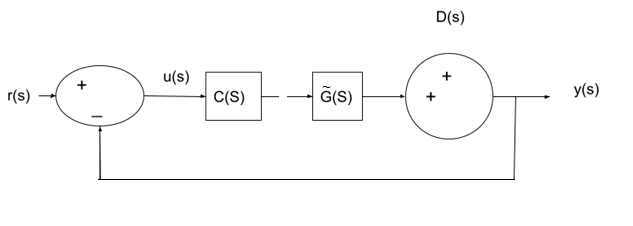

In [5]:
controlador=ControladorNeural()#Inicia o controlador


try:
    controlador.load_state_dict(torch.load("parametrosControlador.pt"))
    controlador.eval()
    file1 = open("melhorErroControlador.txt", "r")  # append mode
    controlador.melhorErro=float(file1.read())
    file1.close()
    
except:
    print("O modelo nao existe, criando o novo")
    torch.save(controlador.state_dict(), "parametrosControlador.pt")
    file1 = open("melhorErroControlador.txt", "w")  # append mode
    file1.write("1000")
    file1.close()
    

In [6]:
#definicoes
import random
arduino = serial.Serial("COM3", 9600)



def gerarComandoAleatorio(min,max):
    
    
    CM1=random.randint(min,max)
    CM2=random.randint(min,max)
    CM3=random.randint(min,max)
    CM4=random.randint(min,max)
    CM5=random.randint(min,max)
    CM6=random.randint(min,max)
    CM7=random.randint(min,max)
    CM8=random.randint(min,max)
    CM9=random.randint(min,max)
    CM10=random.randint(min,max)
    CM11=random.randint(min,max)
    CM12=random.randint(min,max)
    
    comandos=np.array([CM1, CM2, CM3, CM4, CM5, CM6, CM7, CM8, CM9, CM10, CM11, CM12])
    
    return comandos


def obterEstadoAtual(mensagem):
    #print(mensagem)
    if("N T" in mensagem or "Accelerometer" in mensagem or "Gyro" in mensagem or "Filter" in mensagem or "Iniciado" in mensagem or "Mensagem recebida" in mensagem):
        N=0
        T=0
        EM1=0
        EM2=0
        EM3=0
        EM4=0
        EM5=0
        EM6=0
        EM7=0
        EM8=0
        EM9=0
        EM10=0
        EM11=0
        EM12=0
        CM1=0
        CM2=0
        CM3=0
        CM4=0
        CM5=0
        CM6=0
        CM7=0
        CM8=0
        CM9=0
        CM10=0
        CM11=0
        CM12=0
        GyX=0
        GyY=0
        GyZ=0
        AcX=0
        AcY=0
        AcZ=0
        Tmp=0
        HCSR=0
        X=0
        Y=0
        Z=0
        
    else:
        # Escreve os dados no arquivo
        file1 = open("dados.txt", "a")  # append mode
        file1.write(str(mensagem[2:-5])+"\n")
        file1.close()
        
        #
        file1 = open("dados.txt", "r")  # read mode
        linhas = file1.readlines()
        
        # Verificar o número de linhas no arquivo
        num_linhas = len(linhas)
        
        file1.close()
        
        # Verificar se o número de linhas excede o limite
        if num_linhas > 1000:
            # Calcular quantas linhas devem ser removidas do início
            linhas_removidas = num_linhas - 1000
            
            # Remover as linhas excedentes do início
            file1 = open("dados.txt", "w")  # write mode
            linhas = linhas[linhas_removidas:len(linhas)-1]
            arquivo.writelines(linhas)
            file1.close()
            
        mensagem=mensagem.replace("b'{","")
        mensagem=mensagem.replace("}","")
        mensagem=mensagem.split()
        
        
        N=float(mensagem[0])
        T=float(mensagem[1])
        EM1=float(mensagem[2])
        EM2=float(mensagem[3])
        EM3=float(mensagem[4])
        EM4=float(mensagem[5])
        EM5=float(mensagem[6])
        EM6=float(mensagem[7])
        EM7=float(mensagem[8])
        EM8=float(mensagem[9])
        EM9=float(mensagem[10])
        EM10=float(mensagem[11])
        EM11=float(mensagem[12])
        EM12=float(mensagem[13])
        CM1=float(mensagem[14])
        CM2=float(mensagem[15])
        CM3=float(mensagem[16])
        CM4=float(mensagem[17])
        CM5=float(mensagem[18])
        CM6=float(mensagem[19])
        CM7=float(mensagem[20])
        CM8=float(mensagem[21])
        CM9=float(mensagem[22])
        CM10=float(mensagem[23])
        CM11=float(mensagem[24])
        CM12=float(mensagem[25])
        GyX=float(mensagem[26])
        GyY=float(mensagem[27])
        GyZ=float(mensagem[28])
        AcX=float(mensagem[29])
        AcY=float(mensagem[30])
        AcZ=float(mensagem[31])
        Tmp=float(mensagem[32])
        HCSR=float(mensagem[33])
        X=float(mensagem[34])
        Y=float(mensagem[35])
        Z=float(mensagem[36])
        
    
    return (N,T,EM1,EM2,EM3,EM4,EM5,EM6,EM7,EM8,EM9,EM10,EM11,EM12,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,CM9,CM10,CM11,CM12,GyX,GyY,GyZ,AcX,AcY,AcZ,Tmp,HCSR,X,Y,Z)
    
def pontuacao(X_array,Y_array,setPoint):
    
    total=0
    kAnterior=X_array[0]
    yAtual=0
    xAtual=0
    
    
    for k in X_array:
        erroAtual=np.abs(k-setPoint[0])
        erroAnterior=np.abs(kAnterior-setPoint[0])
        if(erroAtual<erroAnterior):
            total=total+1
        else:
            totaol=total-1
            
        kAnterior=X_array[1]
        xAtual=k
    
    for k in Y_array:
        erroAtual=np.abs(k-setPoint[0])
        erroAnterior=np.abs(kAnterior-setPoint[0])
        if(erroAtual<erroAnterior):
            total=total+1
        else:
            total=total-1
        yAtual=k
        
    erroAtual=np.abs(xAtual-setPoint[0])+np.abs(yAtual-setPoint[1])
    
    if(erroAtual<5):
        total=total+15

        

            
    
    return total


In [7]:
timePrintSerial=True
timePrintControlador=False
timePrintPreditiva=False

modoEstudo=False
modoControle=True
timeAviso=5
timeOut=10


import threading

from threading import Thread
import sys
import time
lastFeed=time.time()
N2=0
lock = threading.Lock()

def comunicacaoSerial():
    debugSerial=""
    X_array=[]
    Y_array=[]
    
    X_Ref_array=[]
    Y_Ref_array=[]
    
    setPoint=[0,0]
    mensagem=" "
    dado_0=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]#dado presente
    dado_1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]#dado amostra anterior
    dado_2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]#dado duas amostras anteriores
    global N2
    
    NAnterior=0
    while(1):
            # Adquire o lock antes de acessar a variável compartilhada
        lock.acquire()
        try:
            N2 += 1
        finally:
            # Libera o lock após acessar a variável compartilhada
            lock.release()
        try:
            
            
            mensagem=lerRobo(arduino)
            
            N,T,EM1,EM2,EM3,EM4,EM5,EM6,EM7,EM8,EM9,EM10,EM11,EM12,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,CM9,CM10,CM11,CM12,GyX,GyY,GyZ,AcX,AcY,AcZ,Tmp,HCSR,X,Y,Z=obterEstadoAtual(mensagem)
         

                
   
            if(N!=NAnterior and N!=0):
                NAnterior=N
                debugSerial=debugSerial+("_____________________LEITURA ROBO_______________________\n")
                
                debugSerial=debugSerial+("Ciclos arduino     : "+str(N)+" ciclos\n")
                
                debugSerial=debugSerial+("Ciclos Python      : "+str(N2)+" ciclos")+"\n"
                debugSerial=debugSerial+("Tempo              : "+str(T)+" ms")+"\n"
                debugSerial=debugSerial+("Estados motores    : "+str(EM1)+" "+str(EM2)+" "+str(EM3)+" "+str(EM4)+" "+str(EM5)+" "+str(EM6)+" "+str(EM7)+" "+str(EM8)+" "+str(EM9)+" "+str(EM10)+" "+str(EM11)+" "+str(EM12))+"\n"
                debugSerial=debugSerial+("Ultimo comando     : "+str(CM1)+" "+str(CM2)+" "+str(CM3)+" "+str(CM4)+" "+str(CM5)+" "+str(CM6)+" "+str(CM7)+" "+str(CM8)+" "+str(CM9)+" "+str(CM10)+" "+str(CM11)+" "+str(CM12))+"\n"
                debugSerial=debugSerial+("Giroscopio(X,Y,Z)  : "+str(GyX)+" "+str(GyY)+" "+str(GyZ))+"\n"
                debugSerial=debugSerial+("Acelerometro(X,Y,Z): "+str(AcX)+" "+str(AcY)+" "+str(AcZ))+"\n"
                debugSerial=debugSerial+("Temperatura        : "+str(Tmp))+"\n"
                debugSerial=debugSerial+("Distancia          : "+str(HCSR))+"\n"

                
                
                X_array.append(X)#adiciona x em um vetor
                Y_array.append(Y)#adiciona y em um vetor
                
                X_Ref_array.append(setPoint[0])
                Y_Ref_array.append(setPoint[1])
                
                if len(X_array) <= 15:
                    X_array = X_array[:]  # Mantem a lista inteira
                else:
                    X_array = X_array[-15:]  # Pega os últimos 15 elementos da lista
                    
                if len(Y_array) <= 15:
                    Y_array = Y_array[:]  # Mantem a lista inteira
                else:
                    Y_array = Y_array[-15:]  # Pega os últimos 15 elementos da lista
                    
                if len(X_Ref_array) <= 15:
                    X_Ref_array = X_Ref_array[:]  # Mantem a lista inteira
                else:
                    X_Ref_array = X_Ref_array[-15:]  # Pega os últimos 15 elementos da lista
                    
                if len(Y_Ref_array) <= 15:
                    Y_Ref_array = Y_Ref_array[:]  # Mantem a lista inteira
                else:
                    Y_Ref_array = Y_Ref_array[-15:]  # Pega os últimos 15 elementos da lista
                    
                X=np.mean(X_array)//1#faz a media dos valores para eliminar o erro do sensor
                Y=np.mean(Y_array)//1#faz a media dos valores para eliminar o erro do sensor
                
                debugSerial=debugSerial+("Angulo             : "+str(X)+" "+str(Y)+" "+str(Z))+"\n"
                debugSerial=debugSerial+("_____________________Enviando COMANDO____________________")+"\n"
                debugSerial=debugSerial+("Set Point(X,Y)     :("+str(setPoint[0])+","+str(setPoint[1])+")")+"\n"
                
                

                if(modoEstudo):
                    debugSerial=debugSerial+("MODO: ESTUDO")+"\n"
                    novosComandos=gerarComandoAleatorio(85,95)
                if(modoControle):
                    debugSerial=debugSerial+("MODO: CONTROLE")+"\n"
                    entrada=np.array([setPoint[0],setPoint[1],X,Y],dtype=np.float)
                    x0=torch.from_numpy(entrada).float()#testeval
                    yh0=controlador.forward(x0)
                    novosComandos=np.array((180*yh0.detach().numpy())//1,dtype=np.int)
                    
                    
                debugSerial=debugSerial+("Comando Enviado     : \n")
                debugSerial=debugSerial+str(novosComandos)+"\n"
                debugSerial=debugSerial+("____________________Analise de desempenho__________________")+"\n"
                debugSerial=debugSerial+("Pontuação:"+str(pontuacao(X_array,Y_array,setPoint)))+"\n"
                
                plt.plot(X_array)
                plt.plot(Y_array)
                plt.show()
                
                try:
                    file = open("ultimosDados.txt", "w")  # append mode
                    file.write("X="+str(X_array)+"\nY="+str(Y_array)+"\nX(referencia)="+str(X_Ref_array)+"\nY(referencia)="+str(Y_Ref_array))
                    file.close()
                except:
                    erroAbrirArquivo="erro"
                
                
                mensagemParaArduino=str(novosComandos).replace("[","").replace("]","").replace(".","")+" "
                debugSerial=debugSerial+(mensagemParaArduino)+"\n"
                arduino.write(mensagemParaArduino.encode())
                
                print(debugSerial)
                clear_output(wait=True)  # Limpa a saída atual e espera por nova saída
           
               # print("_____________________Feedback Arduino____________________")
                #mensagem=lerRobo(arduino)
               # print(mensagem)
                debugSerial=""
                 
                
        except:
            erro="Falha"
            print("erro")
            
def recompensa(vetorX,vetorY,XP,XY,vetorXRef,vetorYRef):
    
    FD=0.5 #Fator de desconto
    
    recompensaTotal=0
    
    N=14
    
    for k in vetorX:
        rec=(FD**N)*k
        recompensaTotal=recompensaTotal+rec
        N=N-1
    
    N=14
    for k in vetorY:
        rec=(FD**N)*k
        recompensaTotal=recompensaTotal+rec
        N=N-1
        
    
    
    return 1
    
def treinamentoControlador():
    global N2
    
    

    
    
    while(1):
        
        debugTreinamentoC=""
        
        # Adquire o lock antes de acessar a variável compartilhada
        lock.acquire()
        try:
            N2 += 1
        finally:
            # Libera o lock após acessar a variável compartilhada
            lock.release()
        
        try:
            
            #le os ultimos valores de angulo

            file = open("ultimosDados.txt", "r")  # append mode
            linhas = file.readlines()
            file.close()

            vetorX=np.array(linhas[0].replace("X=[","").replace("]\n","").replace(",","").split(),dtype=float)

            vetorY=np.array(linhas[1].replace("Y=[","").replace("]\n","").replace(",","").split(),dtype=float)

            vetorXRef=np.array(linhas[2].replace("X(referencia)=[","").replace("]\n","").replace(",","").split(),dtype=float)

            vetorYRef=np.array(linhas[3].replace("Y(referencia)=[","").replace("]","").replace(",","").split(),dtype=float)

            #le o dado previsto
            file=open("proximoPasso.txt", "r")  # append mode
            linhas = file.readlines()
            file.close()

            vetorPrevisto=np.array(linhas[0].replace("{","").replace("}","").split(","),dtype=float)

            XP=vetorPrevisto[0]
            YP=vetorPrevisto[1]

            rec=recompensa(vetorX,vetorY,XP,XP,vetorXRef,vetorYRef)

            file = open("recompensa.txt", "w")  # append mode
            file.write(str(rec))
            file.close()

        #V(t)=γ^N R(t-N)…+γ^1 R(t-1)+γ^0 R(t) + γ^1  R(t+1)+ γ^N R(t+N)
        except:
            erro="erro"
            
        
            
            
        
        
        
    
            
        

def acuracia(vetor1,vetor2):
    
    diferenca=(vetor1-vetor2)
    

    
    
    acuracias=[]
    for k in diferenca:
        soma=0
        for i in k:
            soma=soma+np.abs(i.item())
            
        acuracias.append(soma/23)
        
    
    acertos=1-1*np.mean(np.array(acuracias))
        
    
    return acertos*100   

def previsao(modeloPreditivo):
    X=0
    Y=0
    vetorTratado=[]
    try:#le as ultimas tres linhas do arquivo e organiza elas em um vetor
        file = open("dados.txt", "r")  # append mode
        linhas = file.readlines()
        ultimas_tres_linhas = linhas[-3:]
        file.close()
        for linha in ultimas_tres_linhas:
            linhaTratada=linha.replace("{","").replace("}","")
            vetor=np.array(linhaTratada.split(),dtype=float)
            vetorTratado.append(vetor)
    except:
        print("erro ao abrir o arquivo")
    
    
    dado2PassosAntes=vetorTratado[0][2:]
    dado1PassoAntes=vetorTratado[1][2:]
    dadoAtual=vetorTratado[2][2:]
    
    
    entrada=[]
    
    for k in dadoAtual:
        entrada.append(k)
        
    for k in dado1PassoAntes:
        entrada.append(k)
        
    for k in dado2PassosAntes:
        entrada.append(k)
        
    entrada=np.array(entrada,dtype=float)
    

    
    x0=torch.from_numpy(entrada).float()#testeval
    yh0=modeloPreditivo.forward(x0)
    angulos=np.array((yh0.detach().numpy()),dtype=np.float)
    
    X=(angulos[0]*360.00)-180.00
    Y=(angulos[1]*360.00)-180.00
    
    return X,Y

            
def treinamentoRedePreditiva(nEpocas,modelo,Aprendizado,arquivo,arquivoParametros,arquivoSaida1,arquivoSaida2 ):
    global N2

        
    debugTreinamentoP=""

    # Adquire o lock antes de acessar a variável compartilhada
    lock.acquire()
    try:
        N2 += 1
    finally:
        # Libera o lock após acessar a variável compartilhada
        lock.release()
    dados_train,y_train=gerarDadosTrain(arquivo)
    quantidadeEpocasIdeal=0

    #funcao perda
    lossFun=nn.MSELoss()
      #tempo de treinamentoi
    tic=time.time()
    cont=0
    cont2=0
    modelo.train();#modelo em modo treinamento

    trn_loss, val_acc=[],[]

    for epoca in range(nEpocas):

        optimizer = optim.SGD(modelo.parameters(),lr=Aprendizado)  
        #print("Epoca ",(epoca+1))

    #propagacao
        yh_train=modelo(dados_train)
        erro=lossFun(yh_train,y_train)
          #print("erro",erro)
        trn_loss.append(erro.item())  

    #retropropagacao
        optimizer.zero_grad()
        erro.backward()
        optimizer.step()

    #registrando erro no treinamento
        acertos=acuracia(yh_train,y_train)
        val_acc.append(acertos) 
        
        if(cont2>=(nEpocas/1000)):
#             print(".",end=".")
            cont2=0
            
           
     
#         print("\nEpoca: "+str(epoca)+" Time: "+str(((time.time()-tic)//6)/10)+"min ->Neuronios atualizados, erro atual: "+str(erro.item())+" acuracia: "+str(acertos))
        quantidadeEpocasIdeal=epoca
        modelo.melhorErro=erro.item()

        file1 = open(arquivoSaida1, "a")  # append mode
        file1.write(str(erro.item())+"\n")
        file1.close()

        file2 = open("melhorErroPreditiva.txt", "w")  # append mode
        file2.write(str(modelo.melhorErro))
        file2.close()

        file3 = open(arquivoSaida2, "a")  # append mode
        file3.write(str(acertos)+"\n")
        file3.close()
        cont=0
        torch.save(modelo.state_dict(), arquivoParametros)
        quantidadeEpocasIdeal=epoca
        cont=cont+1
        cont2=cont2+1
        

    
    return quantidadeEpocasIdeal,modelo
    
def tempo():
    time.sleep(5)
    timePrintSerial=True
    timePrintControlador=False
    timePrintPreditiva=False
    time.sleep(5)
    timePrintSerial=False
    timePrintControlador=True
    timePrintPreditiva=False
    time.sleep(5)
    timePrintSerial=False
    timePrintControlador=False
    timePrintPreditiva=True

In [8]:


class Th1(Thread):#Trhead principal
                  # recebe os dados do arduino, aplica a ação de controle e devolve os dados para o arduino
    

    def __init__ (self):
        Thread.__init__(self)

    def run(self):

            comunicacaoSerial()
            
class Th2(Thread):
    

    def __init__ (self):
        Thread.__init__(self)

    def run(self):
        
        while(1):
            
            roboQuadrupede=redeNeuralPreditiva()

            try:
                
                roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
                roboQuadrupede.eval()
                file = open("melhorErroPreditiva.txt", "r")  # append mode
                roboQuadrupede.melhorErro=float(file.read())
                file.close()
                tic=time.time()
                Epocas=10
                Aprendizado=0.1000

                roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
                roboQuadrupede.eval()
                qEpocas,roboQuadrupede=treinamentoRedePreditiva(Epocas,roboQuadrupede,Aprendizado,"dados.txt","parametrosRedePreditiva.pt","erroPreditiva.txt","acuraciaPreditiva.txt")

                X,Y=previsao(roboQuadrupede)
#                 print("PREVISÃO(X,Y): "+str(X)+", "+str(Y))
                
                file = open("proximoPasso.txt", "w")  # append mode
                file.write("{"+str(X)+","+str(Y)+"}")
                file.close()

            except:
                print("Erro ao abrir modelo")
            
#                 print("O modelo nao existe, criando o novo")
#                 torch.save(roboQuadrupede.state_dict(), "parametrosRedePreditiva.pt")
#                 file1 = open("melhorErroPreditiva.txt", "w")  # append mode
#                 file1.write("1000")
#                 file1.close()
#             print("__________________ TREINAMENTO 1____________________________________________________")


            
            
            
class Th3(Thread):
    

    def __init__ (self):
        Thread.__init__(self)

    def run(self):
            treinamentoControlador()
            

class Th4(Thread):
    

    def __init__ (self):
        Thread.__init__(self)

    def run(self):
        
        debug(debugSerial)


        

                
            
            
thread1 = Th1()
thread2 = Th2()
thread3 = Th3()


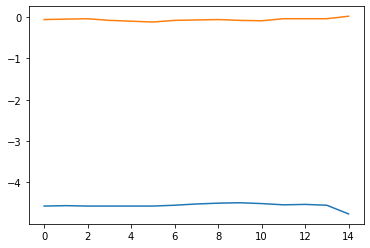

In [9]:
thread1.start()
thread2.start()
thread3.start()